# Batting Stats in IPL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, glob, yaml, pickle
import datetime

from utils import get_player_profile

In [2]:
def consistency_(th_runs=30, min_runs=2500):
    df=pickle.load(open('./database/batting_record_all_years.df', 'rb'))
    all_players = df['batsman'].unique()
    
    data=[]
    for player in all_players:
        dfp     = df[ df['batsman'] == player ]
        Inns_   = dfp.shape[0]
        Runs_   = dfp.Runs.sum()
        BF_     = dfp.BF.sum()
        Inns_th = dfp[dfp['Runs'] >= th_runs].shape[0]
        
        if (Runs_ >= min_runs):
            th_plus = dfp[dfp['Runs'] >= th_runs]['Runs'].shape[0]
            Runs_th = dfp[dfp['Runs'] >= th_runs]['Runs'].sum()

            mu_R      = np.mean(dfp['Runs'])
            sigma_R   = np.std(dfp['Runs'])
            sigma_mu_R= sigma_R/mu_R

            mu_B      = np.mean(dfp['BF'])
            sigma_B   = np.std(dfp['BF'])
            sigma_mu_B= sigma_B/mu_B
            
            RpI     = Runs_/Inns_ 
            BpI     = BF_/Inns_
            data.append([player, Inns_, Inns_th, Runs_, Runs_th, BF_, th_plus, RpI, BpI, mu_R, sigma_R, sigma_mu_R,
                         mu_B, sigma_B, sigma_mu_B])

    df_ = pd.DataFrame( data, columns=[ 'player', 'Innings', 'Innings_th', 'Runs', 'Runs_th', 'BF',
                                       'Th_plus', 'RpI', 'BpI', 'mu_R', 'sigma_R', 'sigma_ov_mu_R',
                                       'mu_B', 'sigma_B', 'sigma_ov_mu_B' ])
    df_['name_and_thplus'] = df_['player']+" ("+df_['Th_plus'].astype(str)+")"
    df_sorted  = df_.sort_values(by=['RpI'], ascending=False)

    return df_sorted

consistency_().head(2)

,player,Innings,Innings_th,Runs,Runs_th,BF,Th_plus,RpI,BpI,mu_R,sigma_R,sigma_ov_mu_R,mu_B,sigma_B,sigma_ov_mu_B,name_and_thplus
19,DA Warner,142,76,5254,4576,3712,76,37.000000,26.140845,37.000000,29.570160,0.799194,26.140845,17.753235,0.679138,DA Warner (76)
23,KL Rahul,72,33,2647,2059,1949,33,36.763889,27.069444,36.763889,28.389402,0.772209,27.069444,18.056490,0.667043,KL Rahul (33)


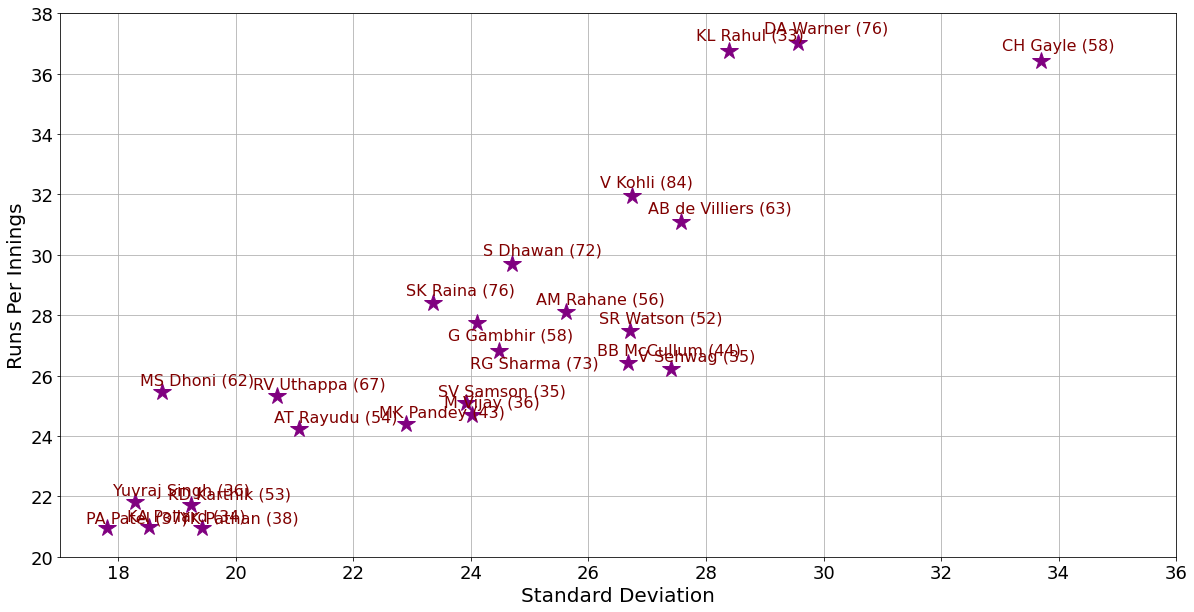

In [3]:
def Plot_avg_rpi():
    df_c=consistency_()
    plt.figure(figsize=(20, 10))
    plt.plot(df_c['sigma_R'], df_c['RpI'], '*', markersize=18, color='purple')
    for i in range(df_c.shape[0]):
        if (df_c.player[i] == 'RG Sharma') or (df_c.player[i] == 'G Gambhir') :
            plt.text(0.98*df_c['sigma_R'][i], 0.98*df_c['RpI'][i], df_c['name_and_thplus'][i], fontsize=16, color='maroon')
        else:
            plt.text(0.98*df_c['sigma_R'][i], 1.01*df_c['RpI'][i], df_c['name_and_thplus'][i], fontsize=16, color='maroon')

    plt.xticks([18, 20, 22, 24, 26, 28, 30, 32, 34, 36], fontsize=18);
    plt.yticks([20, 22, 24, 26, 28, 30, 32, 34, 36, 38], fontsize=18);
    plt.xlabel('Standard Deviation', fontsize=20)
    plt.ylabel('Runs Per Innings',   fontsize=20)
    plt.grid()
Plot_avg_rpi()

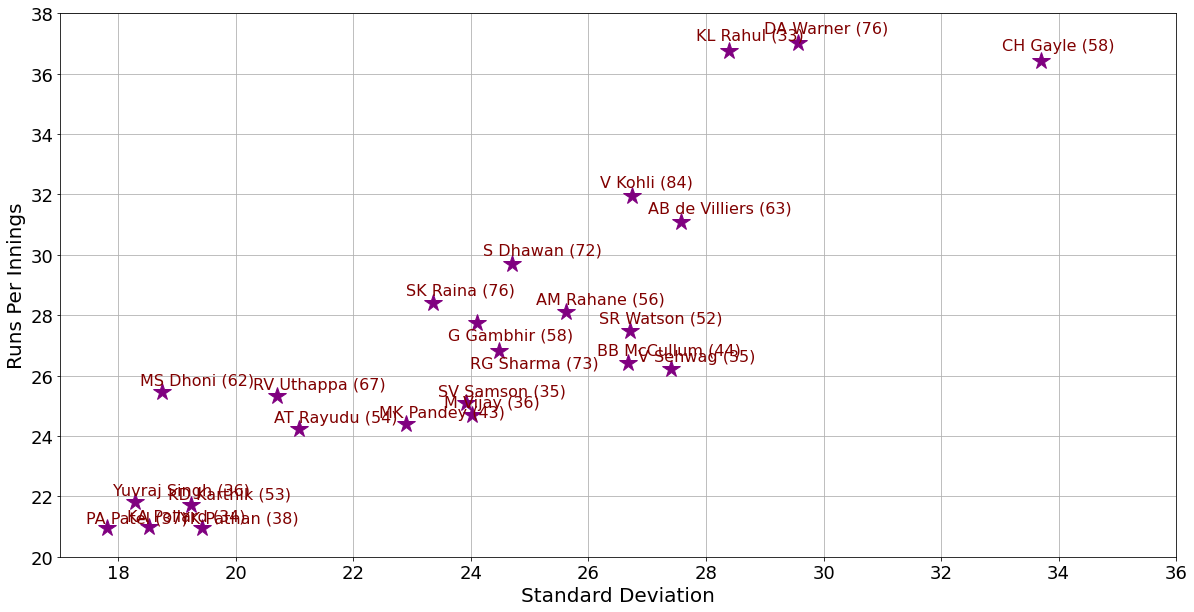

In [4]:
def Plot_avg_bpi():
    df_c=consistency_()
    plt.figure(figsize=(20, 10))
    plt.plot(df_c['sigma_B'], df_c['BpI'], '*', markersize=18, color='purple')
    for i in range(df_c.shape[0]):
        plt.text(0.98*df_c['sigma_B'][i], 0.98*df_c['BpI'][i], df_c['player'][i], fontsize=16, color='maroon')
    plt.xticks([18, 20, 22, 24, 26, 28, 30, 32, 34, 36], fontsize=18);
    plt.yticks([20, 22, 24, 26, 28, 30, 32, 34, 36, 38], fontsize=18);
    plt.xlabel('Standard Deviation', fontsize=20)
    plt.ylabel('Balls Per Innings',   fontsize=20)
    plt.grid()
Plot_avg_rpi()

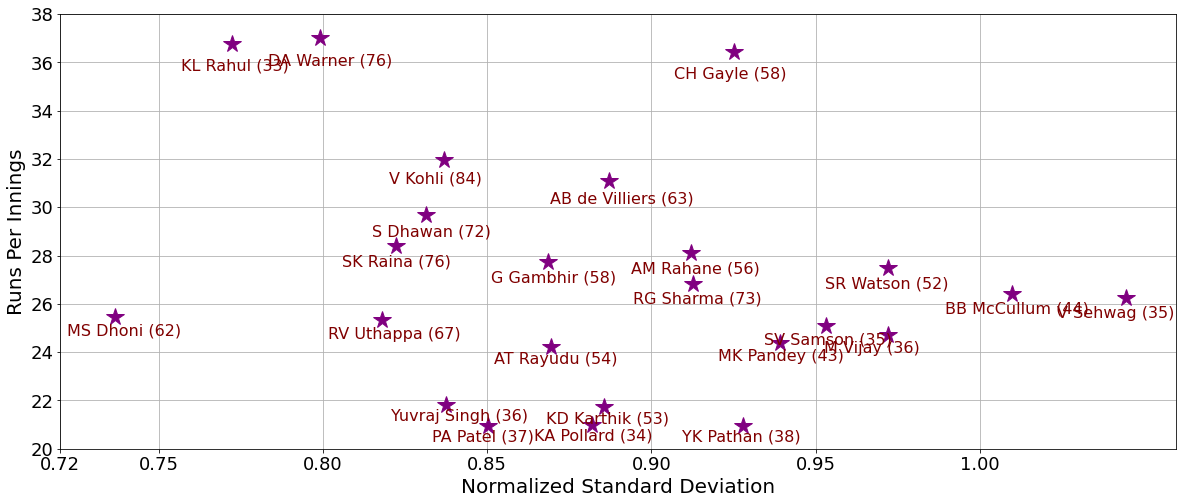

In [5]:
def Plot_sigma_mu():
    df_c=consistency_(th_runs=30)
    plt.figure(figsize=(20, 8))
    plt.plot(df_c['sigma_ov_mu_R'], df_c['mu_R'], '*', markersize=18, color='purple')
    for i in range(df_c.shape[0]):
        plt.text(0.98*df_c['sigma_ov_mu_R'][i], 0.97*df_c['mu_R'][i], df_c['name_and_thplus'][i], fontsize=16, color='maroon')
        #df_c['name_and_thplus'][i]
    plt.xticks([0.72, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], fontsize=18);
    plt.yticks([20, 22, 24, 26, 28, 30, 32, 34, 36, 38], fontsize=18);
    plt.xlabel('Normalized Standard Deviation', fontsize=20)
    plt.ylabel('Runs Per Innings',   fontsize=20)
    plt.grid()
Plot_sigma_mu()

In [6]:
player='SK Raina'
dfs=get_player_profile(player)
dfs

,season,Innings,NO,Runs,BF,HS,Ave,SR,50s,100s,4s,6s
0,2008,14,3,421,295,55,38.27,142.71,3,0,35,18
1,2009,14,0,434,308,98,31.00,140.91,2,0,37,21
2,2010,16,5,520,364,83,47.27,142.86,4,0,45,22
3,2011,16,2,438,325,73,31.29,134.77,4,0,36,17
4,2012,18,1,441,325,73,25.94,135.69,1,0,36,19
5,2013,17,4,548,365,100,42.15,150.14,4,1,50,18
6,2014,16,3,523,359,87,40.23,145.68,5,0,51,19
7,2015,17,2,374,304,62,24.93,123.03,2,0,31,16
8,2016,15,1,399,312,75,28.50,127.88,3,0,39,10
9,2017,14,3,442,307,84,40.18,143.97,3,0,42,13


In [7]:
dfs.drop(10, axis=0)

,season,Innings,NO,Runs,BF,HS,Ave,SR,50s,100s,4s,6s
0,2008,14,3,421,295,55,38.27,142.71,3,0,35,18
1,2009,14,0,434,308,98,31.00,140.91,2,0,37,21
2,2010,16,5,520,364,83,47.27,142.86,4,0,45,22
3,2011,16,2,438,325,73,31.29,134.77,4,0,36,17
4,2012,18,1,441,325,73,25.94,135.69,1,0,36,19
5,2013,17,4,548,365,100,42.15,150.14,4,1,50,18
6,2014,16,3,523,359,87,40.23,145.68,5,0,51,19
7,2015,17,2,374,304,62,24.93,123.03,2,0,31,16
8,2016,15,1,399,312,75,28.50,127.88,3,0,39,10
9,2017,14,3,442,307,84,40.18,143.97,3,0,42,13


In [8]:
df_c=consistency_()
print (df_c.shape)
df_c

(24, 16)


,player,Innings,Innings_th,Runs,Runs_th,BF,Th_plus,RpI,BpI,mu_R,sigma_R,sigma_ov_mu_R,mu_B,sigma_B,sigma_ov_mu_B,name_and_thplus
19,DA Warner,142,76,5254,4576,3712,76,37.000000,26.140845,37.000000,29.570160,0.799194,26.140845,17.753235,0.679138,DA Warner (76)
23,KL Rahul,72,33,2647,2059,1949,33,36.763889,27.069444,36.763889,28.389402,0.772209,27.069444,18.056490,0.667043,KL Rahul (33)
17,CH Gayle,131,58,4772,3884,3179,58,36.427481,24.267176,36.427481,33.706644,0.925308,24.267176,17.818776,0.734275,CH Gayle (58)
1,V Kohli,184,84,5878,4674,4496,84,31.945652,24.434783,31.945652,26.733330,0.836838,24.434783,16.376550,0.670215,V Kohli (84)
16,AB de Villiers,156,63,4849,3724,3192,63,31.083333,20.461538,31.083333,27.571575,0.887021,20.461538,14.457890,0.706589,AB de Villiers (63)
6,S Dhawan,175,72,5197,3908,4096,72,29.697143,23.405714,29.697143,24.691577,0.831446,23.405714,16.458466,0.703182,S Dhawan (72)
9,SK Raina,189,76,5368,3928,3914,76,28.402116,20.708995,28.402116,23.356841,0.822363,20.708995,13.994896,0.675788,SK Raina (76)
14,AM Rahane,140,56,3933,3075,3240,56,28.092857,23.142857,28.092857,25.620276,0.911985,23.142857,17.533059,0.757601,AM Rahane (56)
4,G Gambhir,152,58,4217,3160,3404,58,27.743421,22.394737,27.743421,24.095888,0.868526,22.394737,16.399678,0.732301,G Gambhir (58)
3,SR Watson,141,52,3874,2885,2809,52,27.475177,19.921986,27.475177,26.710580,0.972171,19.921986,14.687318,0.737242,SR Watson (52)
